In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Csv file from the same location

In [138]:
df = pd.read_csv('Test_Cricket_Players.csv')

In [139]:
df.head()

,Unnamed: 0,Name,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 11,Opposition,Ground,Start Date,Unnamed: 15,Result
0,NaN,MS Dhoni,30,83,54,6,0,55.55,7,caught,1,NaN,v Sri Lanka,Chennai,2 Dec 2005,Test # 1775,Lost
1,NaN,MS Dhoni,5,19,12,1,0,41.66,7,bowled,1,NaN,v Sri Lanka,Delhi,10 Dec 2005,Test # 1776,Won
2,NaN,MS Dhoni,51*,83,51,5,2,100.00,8,not out,3,NaN,v Sri Lanka,Delhi,10 Dec 2005,Test # 1776,Won
3,NaN,MS Dhoni,49,100,62,7,0,79.03,7,lbw,1,NaN,v Sri Lanka,Ahmedabad,18 Dec 2005,Test # 1778,Won
4,NaN,MS Dhoni,14,26,20,1,0,70.00,7,lbw,3,NaN,v Sri Lanka,Ahmedabad,18 Dec 2005,Test # 1778,Won


In [140]:
df['BF'].head()

0    54
1    12
2    51
3    62
4    20
Name: BF, dtype: object

## converting the object items to numeric values

In [141]:
df['BF'] = pd.to_numeric(df['BF'],errors='coerce')

In [142]:
df['BF'].head()

0    54.0
1    12.0
2    51.0
3    62.0
4    20.0
Name: BF, dtype: float64

In [143]:
n_bf = len(df['BF']) # Number of elements in the column

In [144]:
n_bf

452

In [145]:
n_bf_na = sum(df['BF'].isna()) # number of elements having no values

In [146]:
n_bf_na

39

In [147]:
percent_isna = 100*n_bf_na/n_bf

In [148]:
percent_isna


8.628318584070797

In [149]:
df['BF'].unique()

array([ 54.,  12.,  51.,  62.,  20.,  nan, 153.,  13.,  35.,  10.,  21.,
        22., 118.,  11.,  27.,  52.,  34.,  56.,  32.,   4.,  39.,  25.,
        67.,  38.,  17.,  50.,   5., 159.,   6.,  81.,  64.,  93.,  82.,
        61.,   2.,  87.,  44.,  33., 132., 124.,  84.,  29.,  97.,  73.,
       123.,  89.,  83.,  15., 154., 167., 112., 187.,  47., 138.,  30.,
        28.,  14.,   9.,  72., 156., 106.,  57.,   3.,  16., 133., 103.,
        49.,   1.,  96.,  79.,  19., 175.,  37.,   8.,  77., 147.,  94.,
        60., 114., 246., 265.,  43.,  23.,  63.,  40.,  41.,  86., 152.,
       113., 140.,  53., 107., 111.,  24., 136., 213., 193.,  55., 295.,
       206.,  92., 129.,  78., 181., 102., 135.,  75.,  18., 184., 272.,
        99., 230.,  95., 191.,  71., 165., 283.,  90.,  65., 366.,  98.,
       267., 109., 127., 340., 119., 287.,  58., 217., 225., 197., 130.,
        70., 104., 257., 204.,  59., 163., 336., 194.,   7.,  31.,  45.,
        26., 170.,  46.,  85.,  69.,  76., 301.,  4

In [150]:
df.columns

Index(['Unnamed: 0', 'Name', 'Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos',
       'Dismissal', 'Inns', 'Unnamed: 11', 'Opposition', 'Ground',
       'Start Date', 'Unnamed: 15', 'Result'],
      dtype='object')

In [151]:
num_cols = df.columns[2:9]

In [152]:
num_cols

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos'], dtype='object')

# Function to Find the Percentage of the empty values

In [153]:
def percent_empt(df,colname):
    n_vals = len(df[colname])
    df[colname] = pd.to_numeric(df[colname], errors='coerce')
    n_vals_na = sum(df[colname].isna())
    return 100 * n_vals_na / n_vals

## Creating a DF mentioning the percentage of missing values

In [154]:
emp_perc_list =list()
for col in num_cols:
    emp_perc = percent_empt(df,col)
    emp_perc_list.append(emp_perc)

emp_df = pd.DataFrame(zip(num_cols,emp_perc_list),columns=['column','percent missing']) 
emp_df.sort_values('percent missing',ascending=False)    

,column,percent missing
0,Runs,19.911504
1,Mins,14.159292
2,BF,8.628319
3,4s,8.628319
4,6s,8.628319
5,SR,8.628319
6,Pos,8.628319


## Creating Dataframe for all the mean values

In [155]:
Means = list()
for col in num_cols:
    mn = df[col].mean()
    Means.append(mn)
mean_df = pd.DataFrame(zip(num_cols,Means),columns=['columns','Mean value'])
mean_df

,columns,Mean value
0,Runs,36.881215
1,Mins,90.979381
2,BF,66.210654
3,4s,4.237288
4,6s,0.489104
5,SR,53.864140
6,Pos,5.813559


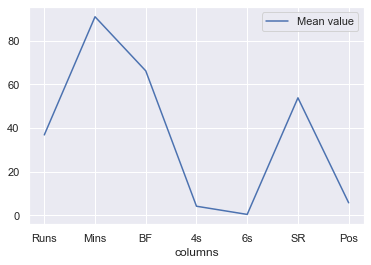

In [156]:
sns.set()
mean_df.set_index('columns').plot()

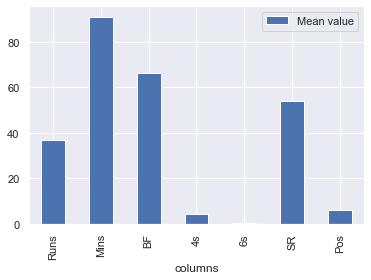

In [157]:
_= mean_df.set_index('columns').plot(kind='bar')

In [158]:
df_bf = df.copy()

In [159]:
df_bf.head()

,Unnamed: 0,Name,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 11,Opposition,Ground,Start Date,Unnamed: 15,Result
0,NaN,MS Dhoni,30.0,83.0,54.0,6.0,0.0,55.55,7.0,caught,1,NaN,v Sri Lanka,Chennai,2 Dec 2005,Test # 1775,Lost
1,NaN,MS Dhoni,5.0,19.0,12.0,1.0,0.0,41.66,7.0,bowled,1,NaN,v Sri Lanka,Delhi,10 Dec 2005,Test # 1776,Won
2,NaN,MS Dhoni,NaN,83.0,51.0,5.0,2.0,100.00,8.0,not out,3,NaN,v Sri Lanka,Delhi,10 Dec 2005,Test # 1776,Won
3,NaN,MS Dhoni,49.0,100.0,62.0,7.0,0.0,79.03,7.0,lbw,1,NaN,v Sri Lanka,Ahmedabad,18 Dec 2005,Test # 1778,Won
4,NaN,MS Dhoni,14.0,26.0,20.0,1.0,0.0,70.00,7.0,lbw,3,NaN,v Sri Lanka,Ahmedabad,18 Dec 2005,Test # 1778,Won


## Fill Empty Cells with Zero

Store the mean value before filling zero

In [160]:
BF_avg_pre = df_bf['BF'].mean()

In [161]:
BF_avg_pre

66.21065375302663

Filling zero values for the empty file 

In [162]:
df_bf['BF'].fillna(0, inplace=True)

In [163]:
BF_avg_zero = df_bf['BF'].mean()

In [164]:
BF_avg_zero

60.49778761061947

In [165]:
BF_avgs = dict()
BF_avgs['pre']=BF_avg_pre
BF_avgs['Zero']=BF_avg_zero

In [166]:
BF_avgs

{'pre': 66.21065375302663, 'Zero': 60.49778761061947}

In [167]:
BF_avgs_df = pd.DataFrame(BF_avgs.items())
BF_avgs_df.columns = ['Imputational Type','Mean Value']

In [168]:
BF_avgs_df

,Imputational Type,Mean Value
0,pre,66.210654
1,Zero,60.497788


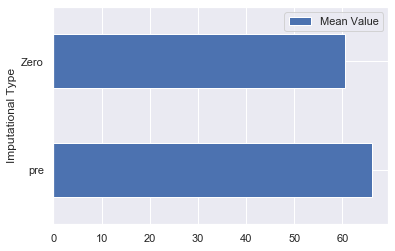

In [169]:
BF_avgs_df.set_index('Imputational Type').plot(kind='barh')

In [170]:
order = {'pre':1,'zero':2}
key = BF_avgs_df['Imputational Type'].map(order)
key

0    1.0
1    NaN
Name: Imputational Type, dtype: float64

In [171]:
key.argsort()

0    0
1   -1
Name: Imputational Type, dtype: int64

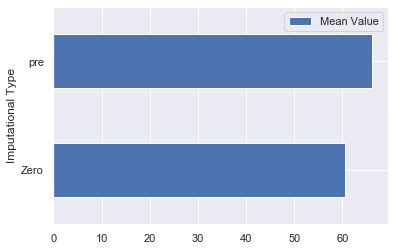

In [172]:
BF_avgs_df.iloc[key.argsort()[::-1]].set_index('Imputational Type').plot(kind='barh')

# Imputing the empty values with existing Mean value

In [173]:
df_bf2 = df.copy()

In [174]:
df_bf2['BF'].fillna(BF_avg_pre, inplace=True)

New Mean after the replacement

In [175]:
Bf_avg_mean = df_bf2['BF'].mean()

In [176]:
Bf_avg_mean

66.21065375302665

In [177]:
len(BF_avgs_df.index)

2

In [178]:
BF_avgs_df

,Imputational Type,Mean Value
0,pre,66.210654
1,Zero,60.497788


In [179]:
n_rows = len(BF_avgs_df.index)
BF_avgs_df.loc[n_rows] = ['Mean',Bf_avg_mean]

In [180]:
BF_avgs_df

,Imputational Type,Mean Value
0,pre,66.210654
1,Zero,60.497788
2,Mean,66.210654


In [181]:
order['Mean']=3
order

{'pre': 1, 'zero': 2, 'Mean': 3}

In [182]:
col_name = 'Imputational Type'
key =BF_avgs_df[col_name].map(order)
key

0    1.0
1    NaN
2    3.0
Name: Imputational Type, dtype: float64

In [183]:
key.argsort()

0    0
1   -1
2    1
Name: Imputational Type, dtype: int64

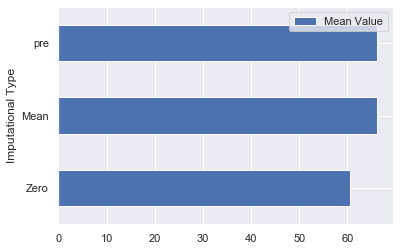

In [184]:
col_name = 'Imputational Type'
key = BF_avgs_df[col_name].map(order)
BF_avgs_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')

## Lets Impute the Max value for the DF

In [185]:
df_bf3 =  df.copy()

In [186]:
df_bf3_max = df_bf3['BF'].max()

In [187]:
df_bf3_max

366.0

# Lets Replace the Empty values with Max values

In [188]:
df_bf3.fillna(df_bf3_max,inplace=True)

In [189]:
order['max'] = 4
order

{'pre': 1, 'zero': 2, 'Mean': 3, 'max': 4}

In [190]:
n_rows = len(BF_avgs_df.index)
BF_avgs_df.loc[n_rows] = ['Max',Bf_avg_mean]
BF_avgs_df

,Imputational Type,Mean Value
0,pre,66.210654
1,Zero,60.497788
2,Mean,66.210654
3,Max,66.210654


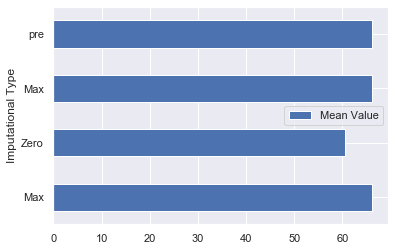

In [191]:
col_name = 'Imputational Type'
key = BF_avgs_df[col_name].map(order)
BF_avgs_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')

# Mean and Max value got same

In [192]:
## Lets Impute empty values with Median values

In [193]:
df_bf4 = df.copy()

In [194]:
df_bf4_median = df_bf4['BF'].median()

In [195]:
df_bf4_median

45.0

In [196]:
df_bf4.fillna(df_bf4_median,inplace=True)

In [197]:
order

{'pre': 1, 'zero': 2, 'Mean': 3, 'max': 4}

In [198]:
order['Median'] = 5

In [199]:
order

{'pre': 1, 'zero': 2, 'Mean': 3, 'max': 4, 'Median': 5}

In [200]:
n_rows = len(BF_avgs_df.index)
BF_avgs_df.loc[n_rows] = ['Median', Bf_avg_mean] # Number of entries in RHS should match the number of columns
BF_avgs_df

,Imputational Type,Mean Value
0,pre,66.210654
1,Zero,60.497788
2,Mean,66.210654
3,Max,66.210654
4,Median,66.210654


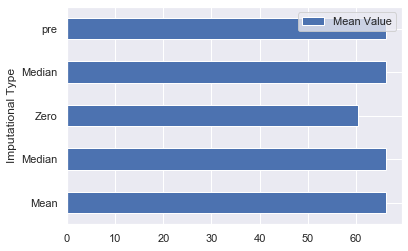

In [201]:
col_name = 'Imputational Type'
key = BF_avgs_df[col_name].map(order)
BF_avgs_df.iloc[key.argsort()[::-1]].set_index(col_name).plot(kind='barh')